In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import csv

In [2]:
import sys

In [3]:
sys.path.append('/u/wangnisn/devel/Machine_learning_dynamics/bayesian')

In [4]:
from get_pareto import ParetoSet, ParetoPoint
from sympy.parsing.sympy_parser import parse_expr
import copy
def csv_add_to_pareto(csv_file, pareto_set=ParetoSet(), header_line=1):
    """
    csv_file.............string, filename of the the csv_file.
                         Format: 
                         first column: x;  second column: y; third column: str or sympy expression. 
    pareto_set...........object of the class ParetoSet. new points will be added into it.
                         Default: an empty Pareto Set. It means that if no pareto_set is inputed, 
                         an empty Pareto Set will be first created, and then the points will be added into it. 
    header_line..........int, number of header lines. Default: 1
    
    return: the new pareto_set which the points in csv_file are added into.
    """
    
    if not isinstance(pareto_set, ParetoSet):
        raise TypeError('pareto_set must be an instance of ', ParetoSet)
    pareto = copy.deepcopy(pareto_set)
    with open(csv_file, newline='') as csv_inf:
        csv_reader = csv.reader(csv_inf )
        for i,row in enumerate(csv_reader):
            if i < header_line:
                continue
            point = ParetoPoint(x=float(row[0]),y=float(row[1]),data=parse_expr(row[2]))
            pareto.add(point)
    return pareto

In [14]:
steps = np.arange(0,301,100)

In [15]:
pareto_set = ParetoSet()

4


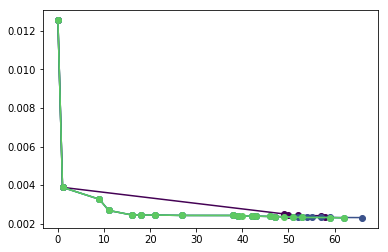

In [16]:
data0 = []
folder = 'test1'
for step in steps:
    data0.append(pd.read_csv(folder+'/pareto_set@'+str(step)+'.csv'))
cmap = mpl.cm.viridis
print (len(data0))
for i in np.arange(len(data0)):
    color=cmap(i / len(data0))
    dd = data0[i].values
    plt.plot(dd[:,0],dd[:,1],'-o',color=color)
#plt.ylim(0.005, 0.01)

In [17]:
steps = np.arange(0,101,100)

2


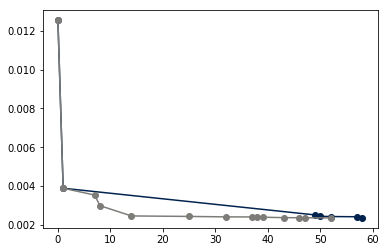

In [18]:
data1 = []
folder = 'test2'
for step in steps:
    data1.append(pd.read_csv(folder+'/pareto_set@'+str(step)+'.csv'))
cmap = mpl.cm.cividis
print (len(data1))
for i in np.arange(len(data1)):
    color=cmap(i / len(data1))
    dd = data1[i].values
    plt.plot(dd[:,0],dd[:,1],'-o',color=color)

In [19]:
steps = np.arange(0,601,100)

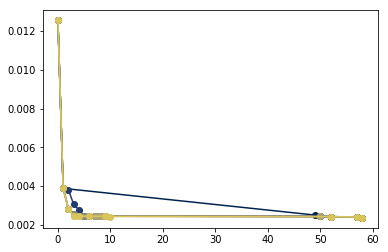

In [20]:
data2 = []
folder = 'test3'
for step in steps:
    data2.append(pd.read_csv(folder+'/pareto_set@'+str(step)+'.csv'))
cmap = mpl.cm.cividis
for i in np.arange(len(data2)):
    color=cmap(i / len(data2))
    dd = data2[i].values
    plt.plot(dd[:,0],dd[:,1],'-o',color=color)

In [21]:
steps = np.arange(0,801,100)

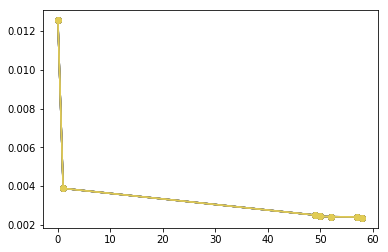

In [22]:
data3 = []
folder = 'test4'
for step in steps:
    data3.append(pd.read_csv(folder+'/pareto_set@'+str(step)+'.csv'))
cmap = mpl.cm.cividis
for i in np.arange(len(data3)):
    color=cmap(i / len(data3))
    dd = data3[i].values
    plt.plot(dd[:,0],dd[:,1],'-o',color=color)
#plt.ylim(10,20)

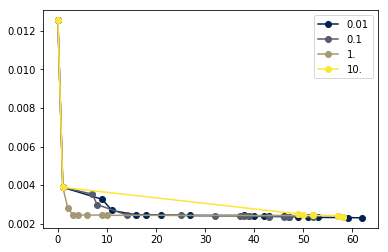

In [23]:
cmap = mpl.cm.cividis
plt.plot(data0[-1].values[:,0],data0[-1].values[:,1] ,'-o',color=cmap(0),label='0.01')
plt.plot(data1[-1].values[:,0],data1[-1].values[:,1] ,'-o',color=cmap(0.33),label='0.1')
plt.plot(data2[-1].values[:,0],data2[-1].values[:,1] ,'-o',color=cmap(0.66), label='1.')
plt.plot(data3[-1].values[:,0],data3[-1].values[:,1] ,'-o',color=cmap(0.99), label='10.')
plt.legend()

In [24]:
from get_pareto import ParetoSet

In [26]:
pareto_set = csv_add_to_pareto('test1/pareto_set@300.csv')
pareto_set = csv_add_to_pareto('test2/pareto_set@100.csv', pareto_set)
pareto_set = csv_add_to_pareto('test3/pareto_set@600.csv', pareto_set)
pareto_set = csv_add_to_pareto('test4/pareto_set@800.csv', pareto_set)
                

In [27]:
pareto_set.save_csv('summary.csv')

In [28]:
dataset = pd.read_csv('summary.csv')

In [29]:
dataset.columns = ['Complexity','CV_MAE', 'Expression']

In [30]:
pd.set_option('display.width', 2000)
dataset

,Complexity,CV_MAE,Expression
0,0.0,0.012552,0
1,1.0,0.003885,-0.400801565626578*u_x
2,2.0,0.002838,-0.246964698592281*u*u_y - 0.424625670296283*u_x
3,3.0,0.002464,-0.427621077500895*u_x - 0.198900863504297*u_x...
4,4.0,0.002453,-0.38446140503877*u**2*u_x*u_y - 3.90367896386...
5,6.0,0.002449,-0.259036319202626*u*u_x*u_y - 896.66568304449...
6,9.0,0.002447,-4.13440577014175*u**2*u_xx*u_y - 13.074973245...
7,10.0,0.002433,-0.209583427883631*u**2*u_x*u_yy - 0.016980664...
8,25.0,0.002430,-0.0152735929374635*u**4 - 0.141557395920175*u...
9,27.0,0.002428,-0.00239990423534148*u**3*u_x - 0.005811107658...


In [31]:
dataset.to_csv('summary.csv',index=None)

Text(0, 0.5, 'MAE')

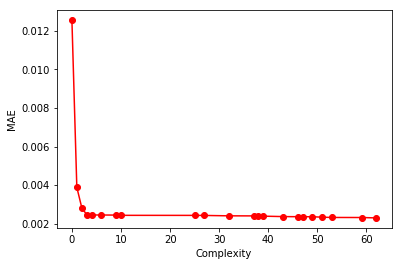

In [44]:
array = pareto_set.to_array()
plt.plot(array[:,0], array[:,1], '-ro')
plt.xlabel('Complexity')
plt.ylabel('MAE')

In [36]:
pareto_set[0].data

0

In [37]:
pareto_set[1].data

-0.400801565626578*u_x

In [38]:
pareto_set[2].data

-0.246964698592281*u*u_y - 0.424625670296283*u_x

In [39]:
pareto_set[3].data

-0.427621077500895*u_x - 0.198900863504297*u_xy*u_yy - 0.153337839887474*u_y

In [40]:
pareto_set[4].data

-0.38446140503877*u**2*u_x*u_y - 3.90367896386113*u_x**2*u_xy - 0.42708843293976*u_x - 0.159368933705483*u_y

In [41]:
pareto_set[5].data

-0.259036319202626*u*u_x*u_y - 896.665683044491*u_x**2*u_xx*u_yy - 415.753594569713*u_x*u_xx*u_y*u_yy - 0.429078377322345*u_x - 0.742477436281247*u_xy*u_yy - 0.157886079663136*u_y

In [42]:
pareto_set[6].data

-4.13440577014175*u**2*u_xx*u_y - 13.0749732456993*u*u_x**2*u_xy - 85.6578637986426*u*u_x*u_xx*u_xy - 0.908130417051318*u*u_x*u_xx - 0.27265189618786*u*u_x*u_y + 0.312491373736007*u*u_xx*u_y - 0.0299695054009013*u*u_xx - 0.428840285275573*u_x - 0.158916316064923*u_y

In [33]:
pareto_df= pd.read_csv('summary.csv')

In [21]:
data = np.load('/u/wangnisn/devel/Machine_learning_dynamics/data/train_data_experiment_2D.npy')

In [22]:
data.shape

(2688000, 7)

In [23]:
120*224

26880

In [24]:
data = np.reshape(data, (100,120,224,7) )

In [25]:
data.shape

(100, 120, 224, 7)

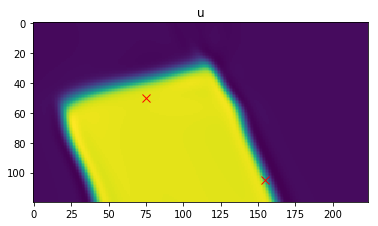

In [33]:
plt.imshow(data[0,:,:,0],cmap='viridis')
plt.title('u')
plt.plot([155],[105],'rx', markersize=8)
plt.plot([75],[50],'rx', markersize=8)

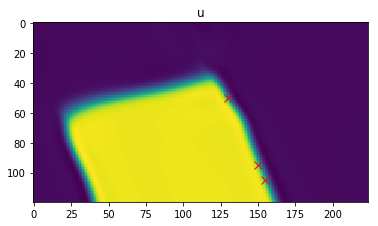

In [109]:
plt.imshow(data[20,:,:,0],cmap='viridis')
plt.title('u')
plt.plot([155],[105],'rx', markersize=8)
plt.plot([150],[95],'rx', markersize=8)
plt.plot([130],[50],'rx', markersize=8)

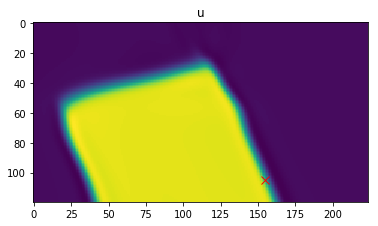

In [111]:
plt.imshow(data[0,:,:,0],cmap='viridis')
plt.title('u')
plt.plot([155],[105],'rx', markersize=8)

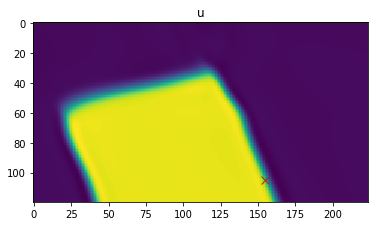

In [112]:
plt.imshow(data[10,:,:,0],cmap='viridis')
plt.title('u')
plt.plot([155],[105],'rx', markersize=8)

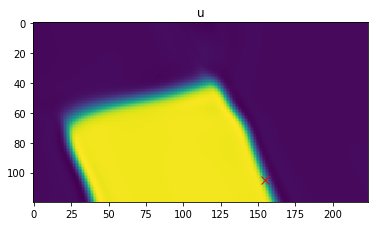

In [113]:
plt.imshow(data[30,:,:,0],cmap='viridis')
plt.title('u')
plt.plot([155],[105],'rx', markersize=8)

Text(0.5, 1.0, 'u_t')

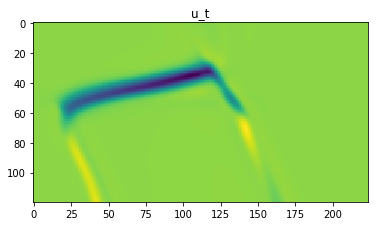

In [64]:
plt.imshow(data[10,:,:,-1],cmap='viridis')
plt.title('u_t')

Text(0.5, 1.0, 'u_x')

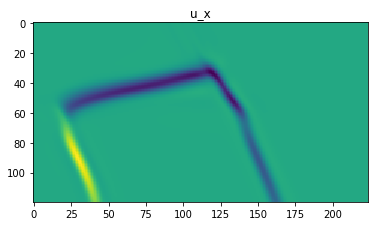

In [66]:
plt.imshow(-data[10,:,:,1],cmap='viridis')
plt.title('u_x')

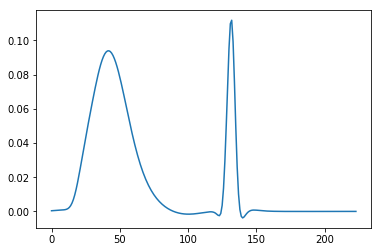

In [119]:
plt.plot(data[10,50,:,1])

In [26]:
from nn_integration_2D import NNIntegration2D

In init py ['/talos/u/wangnisn/devel/Machine_learning_dynamics/examples/phase_field_twoD', '', '/mpcdf/soft/SLE_15/packages/x86_64/keras/anaconda_3_2019.03-2019.03/2.3.1/lib/python3.7/site-packages', '/mpcdf/soft/SLE_15/packages/skylake/tensorflow/gpu/anaconda_3_2019.03-2019.03-cuda_10.0-10.0.130/1.14.0/lib/python3.7/site-packages', '/mpcdf/soft/SLE_15/packages/skylake/pytorch/gpu/anaconda_3_2019.03-2019.03-cuda_10.0-10.0.130/1.2.0/lib/python3.7/site-packages', '/u/wangnisn/kaggle/defect_in_steel/version3/code/dummy_11a', '/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2019.03/lib/python37.zip', '/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2019.03/lib/python3.7', '/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2019.03/lib/python3.7/lib-dynload', '/u/wangnisn/.local/lib/python3.7/site-packages', '/u/wangnisn/.local/lib/python3.7/site-packages/pystem-0.0.13-py3.7-linux-x86_64.egg', '/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2019.03/lib/python3.7/site-packages', '/mpcdf/soft/SLE_15/pa

W0531 23:46:16.169850 47779700252032 __init__.py:308] Limited tf.compat.v2.summary API due to missing TensorBoard installation.
W0531 23:46:16.214514 47779700252032 deprecation_wrapper.py:119] From /u/wangnisn/devel/Machine_learning_dynamics/bayesian/nn_integration_2D.py:35: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.



In [27]:
data.shape

(100, 120, 224, 7)

In [28]:
u_init = data[0,:,:,0]

In [29]:
x_init, y_init = np.meshgrid(np.arange(u_init.shape[0]), np.arange(u_init.shape[1]), indexing='ij')

In [30]:
nn_integration = NNIntegration2D(x_init, y_init, u_init, hidden_layers=[20,20,20,20,20], alpha=10.)

W0531 23:46:19.546012 47779700252032 deprecation_wrapper.py:119] From /u/wangnisn/devel/Machine_learning_dynamics/bayesian/nn_integration_2D.py:106: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0531 23:46:19.608922 47779700252032 deprecation_wrapper.py:119] From /u/wangnisn/devel/Machine_learning_dynamics/bayesian/nn_integration_2D.py:63: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0531 23:46:19.609690 47779700252032 deprecation_wrapper.py:119] From /u/wangnisn/devel/Machine_learning_dynamics/bayesian/nn_integration_2D.py:63: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0531 23:46:20.536525 47779700252032 deprecation_wrapper.py:119] From /u/wangnisn/devel/Machine_learning_dynamics/bayesian/nn_integration_2D.py:65: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0531 23:46:23.414671 47779700252032 lazy_loader.py:50] 
The TensorF

In [31]:
nn_integration.fit(nIter=5000)

It: 0, Loss: 7.708e+03, Time: 4.64
It: 10, Loss: 4.850e+03, Time: 0.62
It: 20, Loss: 4.012e+03, Time: 0.65
It: 30, Loss: 4.043e+03, Time: 0.63


KeyboardInterrupt: 

In [ ]:
%%time
prediction = nn_integration.predict(x_init, y_init, nsteps=10, delta_t=1., expression=pareto_set[1].data)

In [33]:
u_init.shape

(120, 224)

In [34]:
init_frame = np.reshape(prediction[0],u_init.shape)

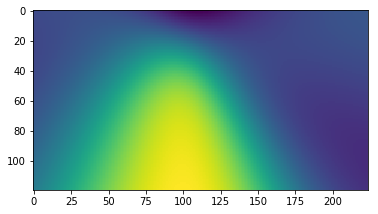

In [35]:
plt.imshow(init_frame)

In [36]:
first_frame = np.reshape(prediction[1],u_init.shape)

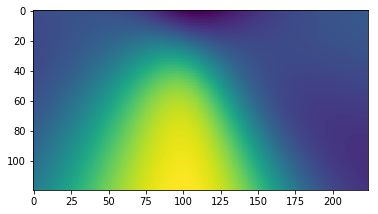

In [37]:
plt.imshow(first_frame)